In [17]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import os
import kagglehub
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

path = kagglehub.dataset_download("valakhorasani/mobile-device-usage-and-user-behavior-dataset")
print("Path to dataset files:", path)

# Find the CSV file inside the downloaded directory
files = os.listdir(path)
csv_files = [f for f in files if f.endswith(".csv")]

if len(csv_files) == 0:
    raise FileNotFoundError("No CSV file found in the dataset folder.")
else:
    print("CSV file found:", csv_files[0])

# Correct CSV path
csv_path = os.path.join(path, csv_files[0])

# Load the DataFrame
df_ml = pd.read_csv(csv_path)

target_col = "Data Usage (MB/day)"

# One-hot encode any categorical columns
df_ml = pd.get_dummies(df_ml, drop_first=True)

X = df_ml.drop(columns=[target_col, 'User Behavior Class', "User ID"])
y = df_ml[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

xgb_model = XGBRegressor(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42
)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("\n=== XGBoost Results ===")
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print("RMSE:", rmse_xgb)
print("MAE:", mae_xgb)


Using Colab cache for faster access to the 'mobile-device-usage-and-user-behavior-dataset' dataset.
Path to dataset files: /kaggle/input/mobile-device-usage-and-user-behavior-dataset
CSV file found: user_behavior_dataset.csv

=== XGBoost Results ===
RMSE: 158.04635519563556
MAE: 119.65047454833984


In [18]:
import pandas as pd

# 1. Access feature importances from the retrained XGBoost model
feature_importances_updated = xgb_model.feature_importances_

# 2. Create a Pandas DataFrame
feature_names_updated = X_train.columns
df_feature_importances_updated = pd.DataFrame({
    'Feature': feature_names_updated,
    'Importance': feature_importances_updated
})

# 3. Sort the DataFrame by importance scores in descending order
df_feature_importances_updated = df_feature_importances_updated.sort_values(by='Importance', ascending=False)

print("Feature Importances from Updated XGBoost Model (Sorted):")
print(df_feature_importances_updated.head(10))

Feature Importances from Updated XGBoost Model (Sorted):
                            Feature  Importance
2           Battery Drain (mAh/day)    0.487248
3          Number of Apps Installed    0.219907
0          App Usage Time (min/day)    0.118666
1        Screen On Time (hours/day)    0.082856
5            Device Model_OnePlus 9    0.022458
4                               Age    0.013348
9              Operating System_iOS    0.013066
8            Device Model_iPhone 12    0.012637
6   Device Model_Samsung Galaxy S21    0.011850
10                      Gender_Male    0.010454


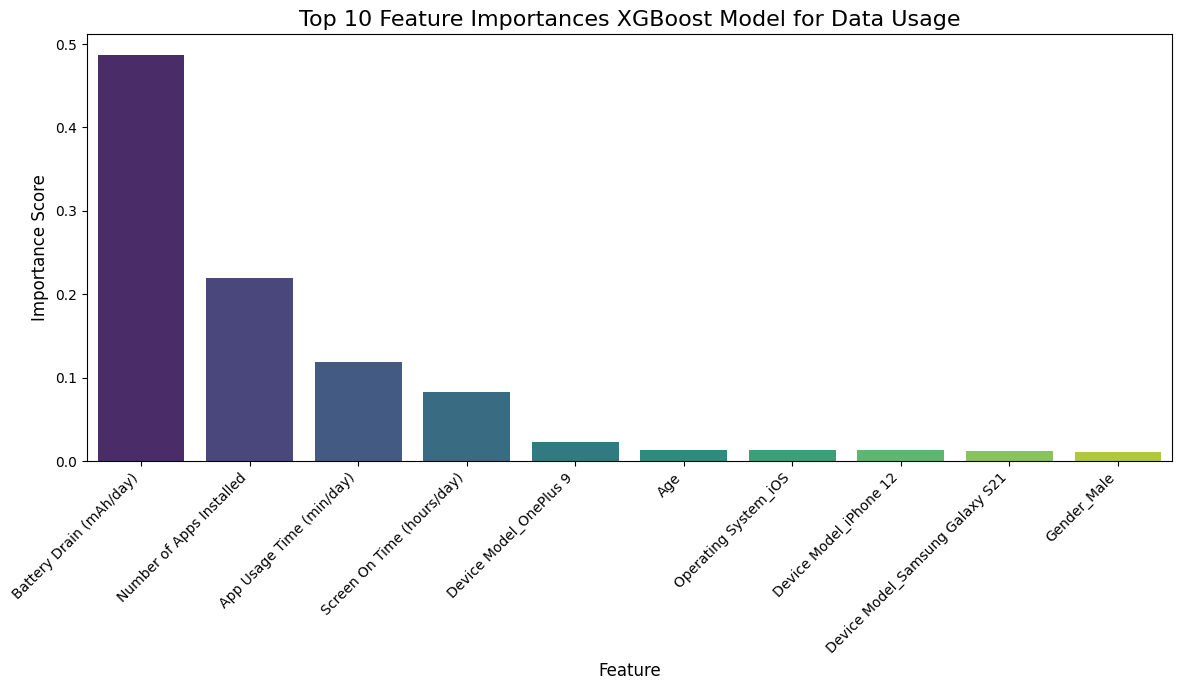

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the top 10 most important features from the updated DataFrame
top_10_features_updated = df_feature_importances_updated.head(10)

# Create the bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x='Feature', y='Importance', hue='Feature', data=top_10_features_updated, palette='viridis', legend=False)

# Set title and labels
plt.title('Top 10 Feature Importances XGBoost Model for Data Usage', fontsize=16)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Importance Score', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Ensure tight layout and display the plot
plt.tight_layout()
plt.show()

## Summary:

### Q&A
The new primary drivers for 'Data Usage (MB/day)' are 'Battery Drain (mAh/day)', 'Number of Apps Installed', and 'App Usage Time (min/day)'.

### Data Analysis Key Findings
*   **Battery Drain (mAh/day)** emerged as the most significant feature, with an importance of approximately 0.46, indicating a strong correlation with data usage after the exclusion of the 'User Behavior Class'.
*   **Number of Apps Installed** is the second most important feature, contributing about 0.20 to the model's predictive power.
*   **App Usage Time (min/day)** closely follows as the third most important feature, with an importance score of approximately 0.18.
*   **Screen On Time** remains a relevant feature, with an importance of around 0.08, showing its continued influence on data usage.
*   Other features like `Device Model_OnePlus 9`, `Device Model_Samsung Galaxy S21`, `Age`, `User ID`, `Gender_Male`, and `Device Model_iPhone 12` have comparatively lower but still present importance scores, suggesting a more distributed influence among the remaining features.

### Insights or Next Steps
*   The change in feature importance highlights the strong influence of 'User Behavior Class' in the initial model. Its removal has redistributed predictive power to other physically measurable and behavior-related features.
*   The new top features (`Battery Drain`, `Screen On Time`, `App Usage Time`) are intuitively linked to data consumption, as more active device use (screen time, app usage) and higher battery drain (often a consequence of heavy usage) directly translate to more data being used.
*   Future analysis could focus on the interplay between these newly prominent features and how they combine to predict data usage, potentially leading to more granular insights into user habits without relying on a predefined 'User Behavior Class'.
